In [1]:
# 실습 1 - Error Back-Propagation 알고리즘 구현

import numpy as np

# 활성화 함수 (Sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 활성화 함수 (Sigmoid) 가울기
def sigmoid_grad(x):
    return x * (1 - x)

# 초기 가중치 설정
def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.1
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.1
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# 정확도 계산
def compute_accuracy(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = np.mean(y_true == y_pred_binary)
    return accuracy

# 순전파 알고리즘
def forward_propagation(X, W1, b1, W2, b2):
    X_bias = np.hstack((X, np.ones((X.shape[0], 1))))
    z1 = np.dot(X_bias, np.vstack((W1, b1)))
    f1 = sigmoid(z1)
    f1_bias = np.hstack((f1, np.ones((f1.shape[0], 1))))
    z2 = np.dot(f1_bias, np.vstack((W2, b2)))
    f2 = sigmoid(z2)
    return f2, f1

# 역전파 알고리즘
def backward_propagation(X, f1, f2, y, W1, b1, W2, b2, learning_rate):
    m = y.shape[0]  # number of samples

    # Output layer error
    error_output_layer = f2 - y
    delta_output_layer = error_output_layer * sigmoid_grad(f2)

    # Hidden layer error
    error_hidden_layer = np.dot(delta_output_layer, W2.T)
    delta_hidden_layer = error_hidden_layer * sigmoid_grad(f1)

    # Gradients for W2 and b2
    grad_W2 = np.dot(f1.T, delta_output_layer)
    grad_b2 = np.sum(delta_output_layer, axis=0, keepdims=True)

    # Gradients for W1 and b1
    grad_W1 = np.dot(X.T, delta_hidden_layer)
    grad_b1 = np.sum(delta_hidden_layer, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * grad_W1
    b1 -= learning_rate * grad_b1
    W2 -= learning_rate * grad_W2
    b2 -= learning_rate * grad_b2

    return W1, b1, W2, b2

# 학습 신경망
def train_neural_network(X_train, y_train, X_test, y_test, input_size, hidden_size, output_size, epochs, learning_rate):
    W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)
    training_accuracy = []
    training_mse = []
    testing_accuracy = []
    testing_mse = []

    for epoch in range(epochs):
        # Forward propagation on training set
        f2_train, f1_train = forward_propagation(X_train, W1, b1, W2, b2)
        
        # Compute accuracy and MSE for training set
        train_accuracy = compute_accuracy(y_train, f2_train)
        train_mse = np.mean((y_train - f2_train) ** 2)
        training_accuracy.append(train_accuracy)
        training_mse.append(train_mse)

        # Forward propagation on testing set
        f2_test, _ = forward_propagation(X_test, W1, b1, W2, b2)
        
        # Compute accuracy and MSE for testing set
        test_accuracy = compute_accuracy(y_test, f2_test)
        test_mse = np.mean((y_test - f2_test) ** 2)
        testing_accuracy.append(test_accuracy)
        testing_mse.append(test_mse)

        # Print MSE and accuracy every 1000 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train MSE = {train_mse}, Train Accuracy = {train_accuracy}, Test MSE = {test_mse}, Test Accuracy = {test_accuracy}")

        # Backward propagation
        W1, b1, W2, b2 = backward_propagation(X_train, f1_train, f2_train, y_train, W1, b1, W2, b2, learning_rate)
        
    return W1, b1, W2, b2, training_accuracy, training_mse, testing_accuracy, testing_mse

Epoch 0: Train MSE = 0.24670977076322304, Train Accuracy = 0.6566137566137566, Test MSE = 0.24667435875241087, Test Accuracy = 0.6567901234567901
Epoch 100: Train MSE = 0.05373078417551321, Train Accuracy = 0.9343915343915344, Test MSE = 0.05584605505222301, Test Accuracy = 0.9259259259259259
Epoch 200: Train MSE = 0.052439557814116994, Train Accuracy = 0.9349206349206349, Test MSE = 0.0551751849220456, Test Accuracy = 0.9271604938271605
Epoch 300: Train MSE = 0.051783544281125464, Train Accuracy = 0.9343915343915344, Test MSE = 0.055571804594957766, Test Accuracy = 0.9271604938271605
Epoch 400: Train MSE = 0.051389182140726235, Train Accuracy = 0.9354497354497354, Test MSE = 0.05596523695824904, Test Accuracy = 0.9259259259259259
Epoch 500: Train MSE = 0.05112891489616749, Train Accuracy = 0.937037037037037, Test MSE = 0.056275616180004484, Test Accuracy = 0.9259259259259259
Epoch 600: Train MSE = 0.05093967925168933, Train Accuracy = 0.9375661375661376, Test MSE = 0.0565257879336616,

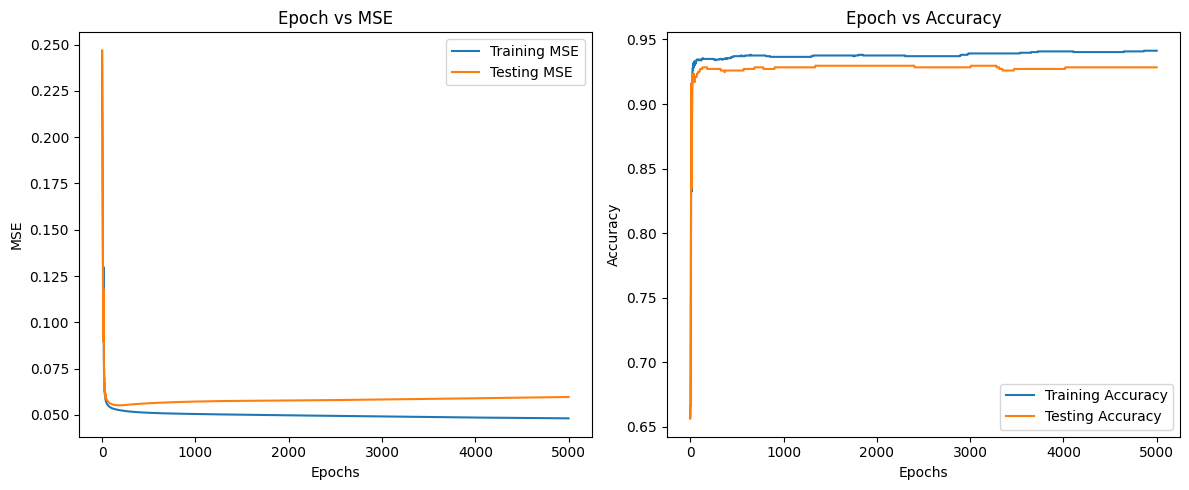

In [2]:
# 실습 2 - Two-Layer Neural Network "Training"

import pandas as pd
import matplotlib.pyplot as plt

# 데이터 분할 (7:3 비율)
def train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.random.permutation(X.shape[0])
    test_size = int(X.shape[0] * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# One-Hot Encoding 구현
def One_Hot_Encoding(y):
    number_of_classes = len(np.unique(y))
    one_hot = np.zeros((len(y), number_of_classes))

    for k in np.arange(0,len(y)):
        for k_1 in range(0, number_of_classes+1):   
            if(y[k] == k_1):                      # y를 전체적으로 순환하여 y[k] = k_1인 경우 미리 만들어둔 One-Hot Encoding 배열의 해당 요소를 1로 변경
                one_hot[k,k_1 - 1] = 1          
                
    return one_hot, number_of_classes

# 데이터 불러오기
raw_data = pd.read_csv("C:/Coding/Python/machine_learning/week11/NN_data.csv", header=0, names=['', 'x0', 'x1', 'x2', 'y'])
X = raw_data[['x0', 'x1', 'x2']].to_numpy()
y = raw_data['y'].to_numpy()

# 데이터 분할 (7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# One-Hot Encoding
y_train_one_hot, _ = One_Hot_Encoding(y_train)
y_test_one_hot, _ = One_Hot_Encoding(y_test)

# 학습 파라미터 설정
input_size = X_train.shape[1]
hidden_size = 10
output_size = y_train_one_hot.shape[1]
epochs = 5000
learning_rate = 0.01

# 신경망 학습
W1, b1, W2, b2, training_accuracy, training_mse, testing_accuracy, testing_mse = train_neural_network(X_train, y_train_one_hot, X_test, y_test_one_hot, input_size, hidden_size, output_size, epochs, learning_rate)

# MSE 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), training_mse, label='Training MSE')
plt.plot(range(epochs), testing_mse, label='Testing MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Epoch vs MSE')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(range(epochs), training_accuracy, label='Training Accuracy')
plt.plot(range(epochs), testing_accuracy, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Sample 1: True Label: 0, Predicted Label: 0
Sample 2: True Label: 2, Predicted Label: 2
Sample 3: True Label: 0, Predicted Label: 0
Sample 4: True Label: 1, Predicted Label: 1
Sample 5: True Label: 0, Predicted Label: 0
Sample 6: True Label: 2, Predicted Label: 2
Sample 7: True Label: 0, Predicted Label: 0
Sample 8: True Label: 0, Predicted Label: 0
Sample 9: True Label: 0, Predicted Label: 0
Sample 10: True Label: 0, Predicted Label: 0
Sample 11: True Label: 0, Predicted Label: 0
Sample 12: True Label: 1, Predicted Label: 1
Sample 13: True Label: 2, Predicted Label: 2
Sample 14: True Label: 0, Predicted Label: 0
Sample 15: True Label: 2, Predicted Label: 2
Sample 16: True Label: 1, Predicted Label: 1
Sample 17: True Label: 0, Predicted Label: 0
Sample 18: True Label: 1, Predicted Label: 1
Sample 19: True Label: 1, Predicted Label: 1
Sample 20: True Label: 0, Predicted Label: 0
Sample 21: True Label: 0, Predicted Label: 0
Sample 22: True Label: 2, Predicted Label: 2
Sample 23: True Lab

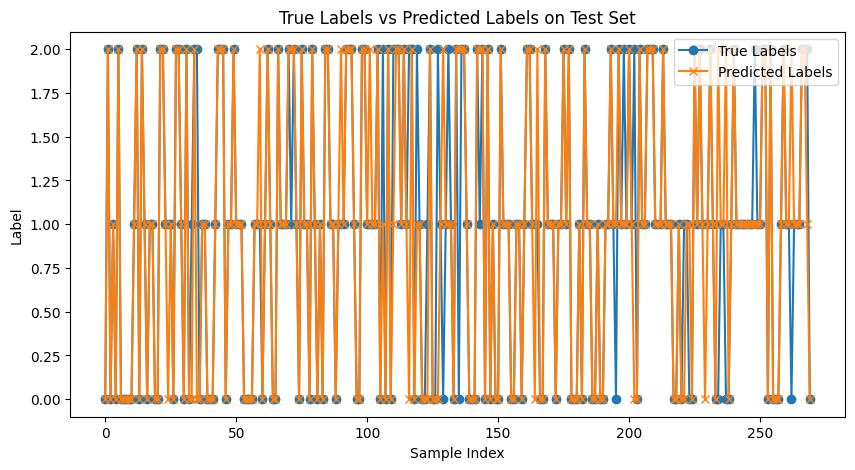

Test Accuracy: 0.928395061728395


In [3]:
# 실습 3 - Two-Layer Neural Network "Test"

def predict(X, W1, b1, W2, b2):
    f2, _ = forward_propagation(X, W1, b1, W2, b2)
    return f2

# Test set에 대한 예측 및 결과 시각화
y_pred_test = predict(X_test, W1, b1, W2, b2)

# 원-핫 인코딩된 레이블을 원래 레이블로 변환
y_test_labels = np.argmax(y_test_one_hot, axis=1)
y_pred_labels = np.argmax(y_pred_test, axis=1)

# 각 샘플에 대한 예측 결과 출력
for i in range(len(X_test)):
    true_label = y_test_labels[i]
    predicted_label = y_pred_labels[i]
    print(f"Sample {i+1}: True Label: {true_label}, Predicted Label: {predicted_label}")

# Test Set에 대한 예측 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test_labels, label='True Labels', marker='o')
plt.plot(y_pred_labels, label='Predicted Labels', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('True Labels vs Predicted Labels on Test Set')
plt.legend()
plt.show()

# Test set에 대한 정확도 계산
test_accuracy = compute_accuracy(y_test_one_hot, y_pred_test)
print("Test Accuracy:", test_accuracy)